# scikit-learn Classifiers
### A supervised learning example
#### By Jonathan Langefeld, April 2017

First we load the required packages. For now let's just import numpy. It's a fundamental package for scientific computing with Python used by many machine learning libraries.

In [1]:
import numpy as np

First let's generate some data we can work with. Good thing scikit-learn delivers sub-packages specifically for this task. So let's start with the [make classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) class.

In [2]:
from sklearn.datasets import make_classification

The following code generates two features which both have some information gain on the target y:

In [3]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

We wouldn't need the following code for modeling, but just for the sake of a little visual representation of what we've just created, let's create a pandas DataFrame (As explained in the [last notebook](Pandas+DataFrame+Operations.html)).

In [4]:
import pandas as pd
df_X = pd.DataFrame(X, columns=['Feature_%s'%x for x in range(X.shape[1])])
df_y = pd.DataFrame(y, columns=['y'])
df = pd.concat([df_X, df_y], axis = 1)
df.head()

,Feature_0,Feature_1,y
0,-0.177497,0.930496,1
1,1.977424,1.766155,0
2,1.800024,1.700343,0
3,-0.770837,2.359163,1
4,-0.308009,1.594063,1


Next let's plot the data using matplotlib. For now we are not interested in ticks and we want the scale of the plot only 0.5 next to all max and min values. To set the center in the middle of our graph, we use [`np.meshgrid()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

[]

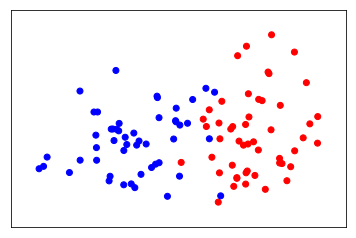

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright).axes
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
# We don't need ticks fro now:
ax.set_xticks(())
ax.set_yticks(())

This is obviously linearly separable data. To compare classifiers, we want to have some different datasets. scikit-learn assists us here as well with the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) and [`make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) classes

In [6]:
from sklearn.datasets import make_moons, make_circles
moons = make_moons(noise=0.3, random_state=0)
circles = make_circles(noise=0.2, factor=0.5, random_state=1)

We now have three datasets created. We store them in a dictonary for now.

In [7]:
datasets = {
    "moons":moons,
    "circles":circles,
    "linearly_separable":linearly_separable
           }

Now of course we want to plot all of our Data. We need some definitions and then a loop that iterates over the three datasets. We use the code from above with [subplots](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot) to plot all three datasets in one row. The code is annotated so let's just go through it with the comments:

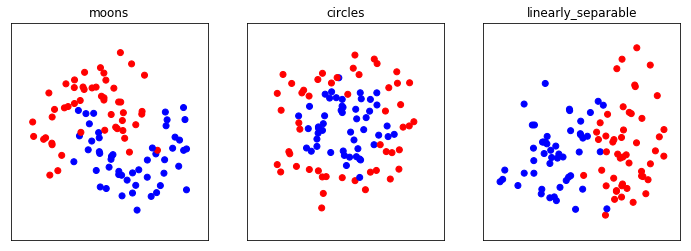

In [8]:
h = .02  # step size in the mesh
zoom = 4 # increase or decrease for the whole figure
figure = plt.figure(figsize=(zoom*len(datasets),zoom)) 
i = 1
for key in datasets:
    ds = datasets[key] #load single dataset from dictonary
    X, y = ds #We have our features as two different arrays. Separate them here
   
    # now plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1,len(datasets), i)
    ax.set_title(key)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

### Classifiers
Our data is now ready to be classified. Let's start with our first one. We'll start with a [k-nearest neighbors vote](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). We also need to import the classfier first from the relevant scikit-learn package. The classifier has some default options, but you can overwrite every single one of them. It's best to check the official documentation.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Let's start with our first dataset:

In [10]:
ds = datasets['linearly_separable']

To see the performance of our classifier we of course want to split our data in [training and testing](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Also most scikit-learn classifiers need [standardized data](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). But there are packages for both of which:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

We extract our data from the dataset, standardize it and split it:

In [12]:
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

We are finelly ready! Let's fit our classifier:

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

We can use the trained classifier for a prediction

In [14]:
clf.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

And of course we want to know the score of the classifier:

In [15]:
score = clf.score(X_test, y_test)
score

0.92500000000000004

Let's create a plot with the decision function as an overly to visualize how good the classifier works. The darker the overlay, the higher the probablity of the prediction:

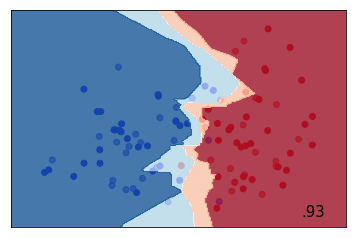

In [16]:
# Plot also the training points
ax = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright).axes
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.6)

#for the best fitting size:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

if hasattr(clf, "decision_function"): #for functions
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else: #for linear classifications
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
#Print the score in the lower right corner.
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')


### Putting it all together
We'll write a function in which we just insert our three datasets and a classifier to campare how good each classifier works on each kind of data. Therefore we just use the code we learned above (the imports would not need to be re-imported in this case. I just put the here to make it easier copy-pasteable):

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

def compare_datasets(datasets, clf):
    h = .02  # step size in the mesh
    zoom = 4 # increase or decrease for the whole figure
    figure = plt.figure(figsize=(zoom*len(datasets),zoom)) 
    figure.suptitle(clf.__class__.__name__, fontsize=14, fontweight='bold') # Add the classifier as a title
    i = 1
    for key in datasets:
        ds = datasets[key] #load single dataset from dictonary
        X, y = ds #We have our features as two different arrays. Separate them here

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) #split the data
        X = StandardScaler().fit_transform(X) #standardize data

        clf.fit(X_train, y_train) #fit classifier
        score = clf.score(X_test, y_test) #score (just to print it on the plot)
        
        # color map definitions
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        
        #define subplot        
        ax = plt.subplot(1,len(datasets), i)
        ax.set_title(key)
        
        # Plot training points
        ax = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright).axes
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.6)
        
        #for the best fitting size:
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # overlay shape:
        if hasattr(clf, "decision_function"): #for functions
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else: #for linear classifications
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        #make it beautiful:
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        #Print the score in the lower right corner.
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
        i += 1

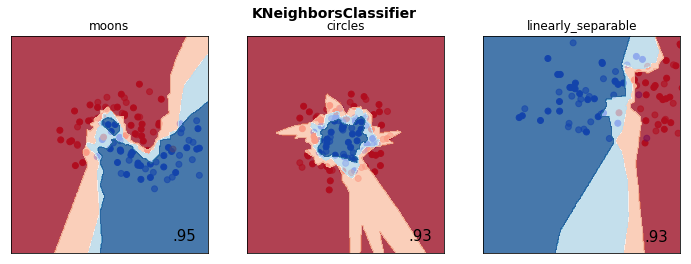

In [18]:
compare_datasets(datasets,clf)

So we see that the K nearest neighbours works pretty well with all datasets.    
To train an algorithm with scikit learn we need to to pretty much always the same few steps:
- Ideally split the data in test and training
- Standardize your features
- Define your classifier
- Fit your classifier
- You're ready to use the classifier in a prediction

Now since all classifiers work so similar, let's just create a list of classifiers and then run the function for each of them:

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

C:\Users\langefj\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


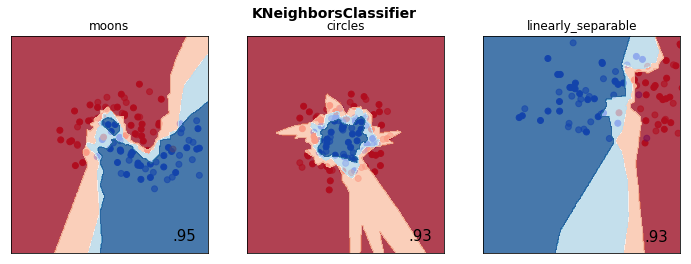

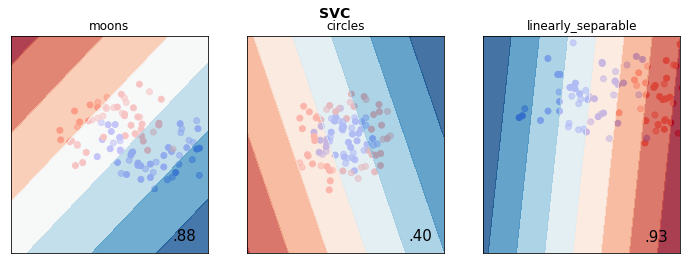

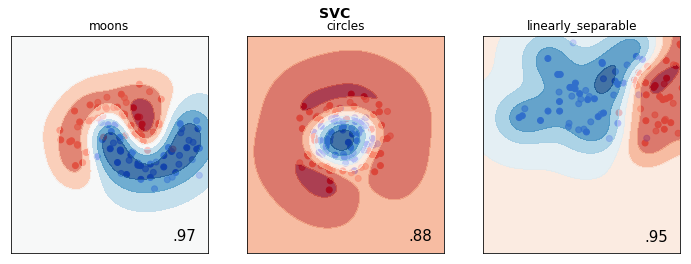

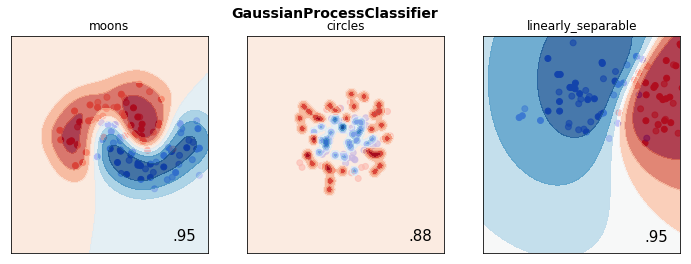

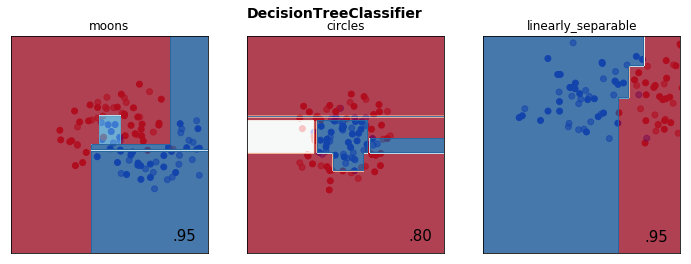

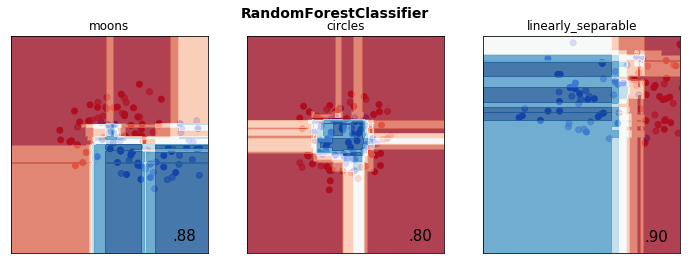

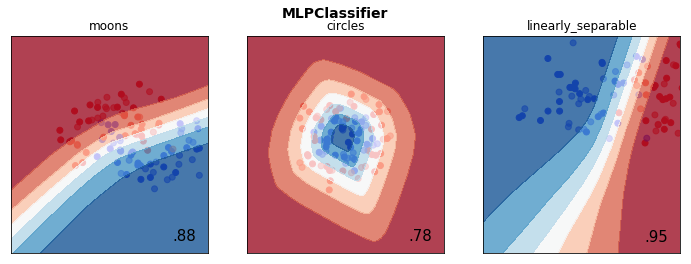

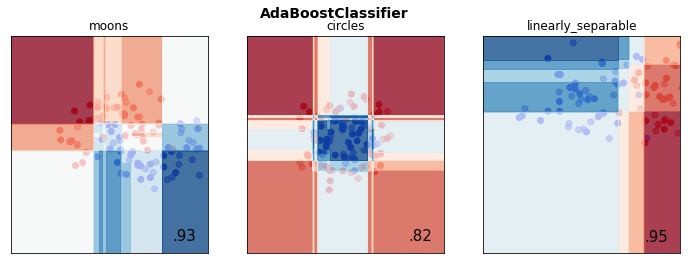

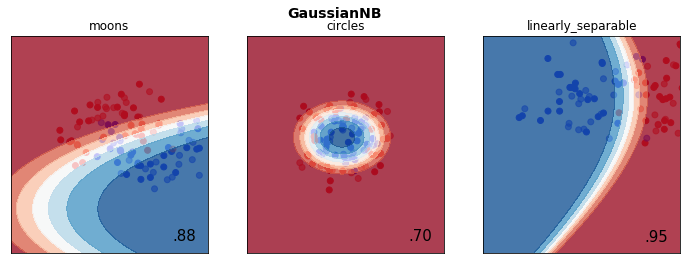

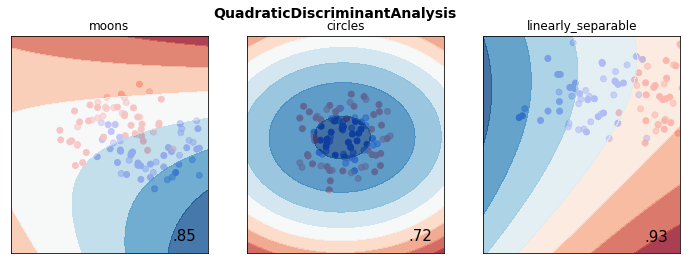

In [20]:
for clf in classifiers:
    compare_datasets(datasets,clf)

This also gives a pretty good overview of how each classifier works and on which kind of data they are good to use. For all supervised learning classifiers I recommend the the official [scikit-learn documentation](http://scikit-learn.org/stable/supervised_learning.html)